# CHAPTER 1 - Analytic Fourier Theory Review

* The analytic Fourier transform of a function g of two variables x and y is given by

$$
G(f_x, f_y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} g(x, y) \exp\left(-j 2 \pi (f_x x + f_y y)\right) dx dy
$$
* short version of Fourier transform:
$$
\mathscr{F}\{g(x, y)\} = G(f_x, f_y)
$$
-------------------------------------------------------------------------------
* The analytic inverse Fourier transform is given by

$$
g(x, y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} G(f_x, f_y) \exp\left(j 2 \pi (f_x x + f_y y)\right) dx dy
$$

* short version of Inverse Fourier transform:
$$
\mathscr{F}\{g(x, y)\} = G(f_x, f_y)
$$
-------------------------------------------------------------------------------
Conditions:
* (a) g must be absolutely integrable over the infinite range of x and y;
* (b) g must have only a finite number of discontinuities; and
* (c) g must have no infinite discontinuities.
-------------------------------------------------------------------------------




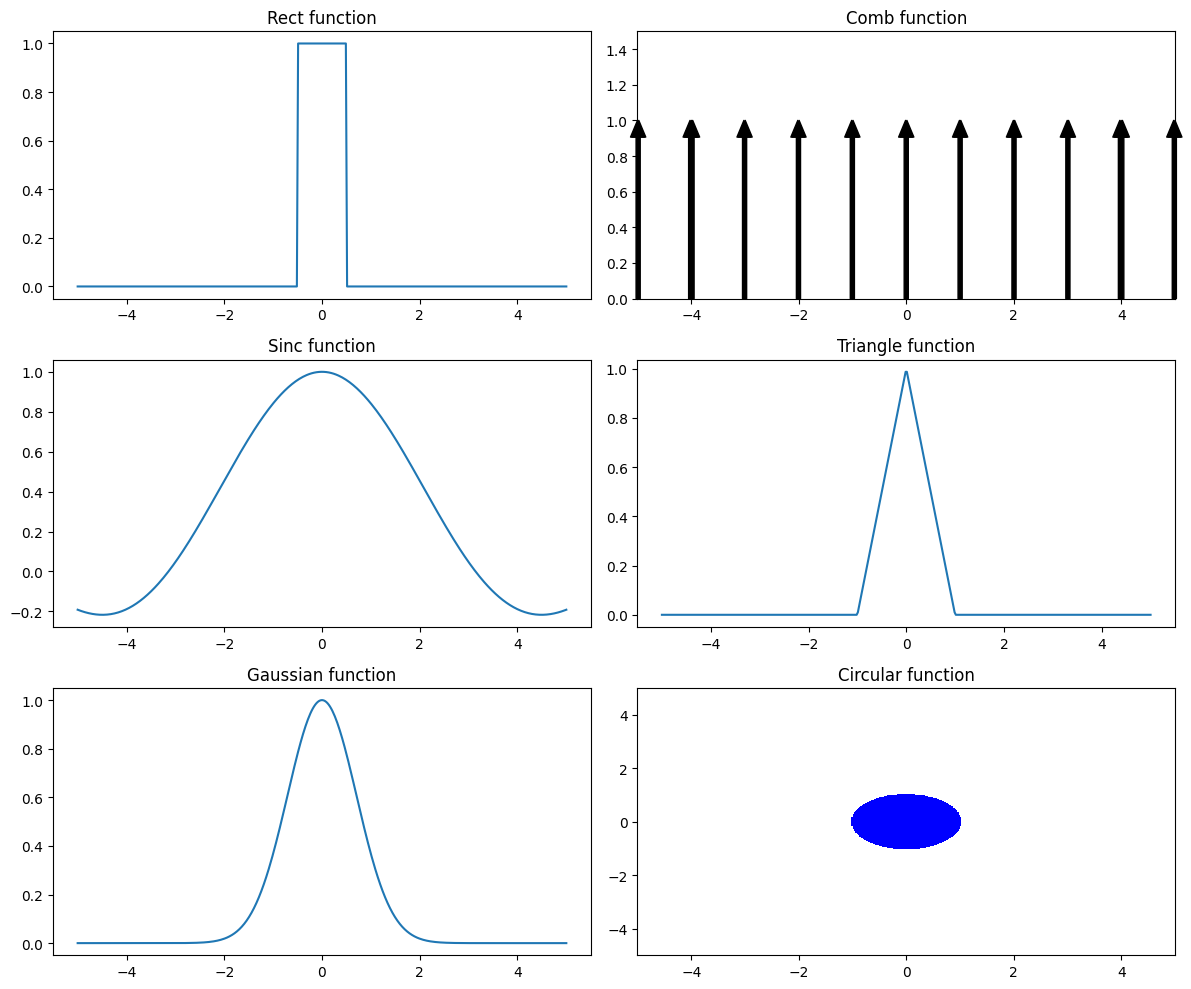

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, fft, ifft, ifftshift
import scipy.signal as signal

# Define the rect function
def rect(x):
    return np.where(np.abs(x) <= 0.5, 1, 0)

def comb(x):
    # Dirac delta approximation: 1 where x is an integer, 0 otherwise
    return np.where(np.abs(x - np.round(x)) < 3e-2, 1, 0)

def circ_(x, y, r):
    return np.where(np.sqrt(x**2 + y**2) <= r, 1, 0)

def sinc(x):
    return np.where(x == 0, 1, np.sin(x) / x)

def triangle(x):
    return np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)

def gauss(x):
    return np.exp(-x**2)

def circ(r):
    return lambda x, y: np.where(np.sqrt(x**2 + y**2) <= r, 1, 0)

# Visualization of the 1D functions
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)

# 1D function plots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Rect function
axs[0, 0].plot(x, rect(x))
axs[0, 0].set_title("Rect function")

# Comb function with arrows at integer values
comb_vals = comb(x)
for i in range(len(x)):
    if comb_vals[i] == 1:  # Only plot arrows for integer positions
        axs[0, 1].annotate("", xy=(x[i], 1), xytext=(x[i], 0),
                          arrowprops=dict(facecolor='black', headwidth=10, width=2))
axs[0, 1].set_xlim([-5, 5])
axs[0, 1].set_ylim([0, 1.5])
axs[0, 1].set_title("Comb function")

# Sinc function
axs[1, 0].plot(x, sinc(x))
axs[1, 0].set_title("Sinc function")

# Triangle function
axs[1, 1].plot(x, triangle(x))
axs[1, 1].set_title("Triangle function")

# Gaussian function
axs[2, 0].plot(x, gauss(x))
axs[2, 0].set_title("Gaussian function")

# 2D plot for the circular function
circ_plot = circ(1)
Z = circ_plot(X, Y)
plt.subplot(3, 2, 6)
plt.contourf(X, Y, Z, levels=[-0.1, 0, 1], colors=["white", "blue"])
plt.title("Circular function")

plt.tight_layout()
plt.show()


In [ ]:
L = 0.5
M = 250
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w = 1
function_to_be_F_transformed1 = rect(X/2*w)* rect(Y/2*w)

print(function_to_be_F_transformed1.round())


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [ ]:
FT_ = fft2(fftshift(function_to_be_F_transformed1))
print(f"FT_ : \n\n{FT_.round()}\n")
print(f"FT_simplified: \n\n{set(list(np.real(FT_).flatten().round()))}")

FT_ : 

[[62500.+0.j     0.+0.j     0.+0.j ...     0.+0.j     0.+0.j     0.+0.j]
 [    0.+0.j     0.+0.j     0.+0.j ...     0.+0.j     0.+0.j     0.+0.j]
 [    0.+0.j     0.+0.j     0.+0.j ...     0.+0.j     0.+0.j     0.+0.j]
 ...
 [    0.+0.j     0.+0.j     0.+0.j ...     0.+0.j     0.+0.j     0.+0.j]
 [    0.+0.j     0.+0.j     0.+0.j ...     0.+0.j     0.+0.j     0.+0.j]
 [    0.+0.j     0.+0.j     0.+0.j ...     0.+0.j     0.+0.j     0.+0.j]]

FT_simplified: 

{0.0, 62500.0}


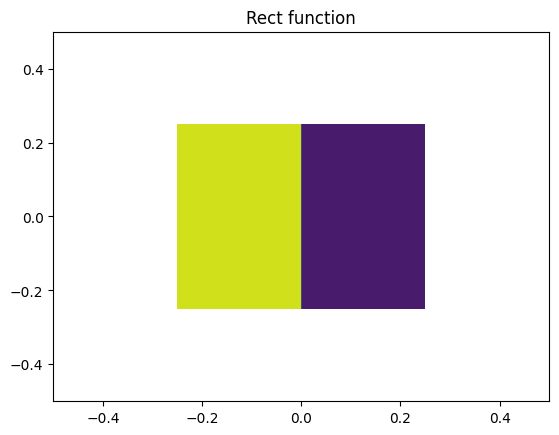

[[31250.    +0.j   250.-19893.j     0.    +0.j ...   250. +6628.j
      0.    +0.j   250.+19893.j]
 [    0.    +0.j     0.    +0.j     0.    +0.j ...     0.    +0.j
      0.    +0.j     0.    +0.j]
 [    0.    +0.j     0.    +0.j     0.    +0.j ...     0.    +0.j
      0.    +0.j     0.    -0.j]
 ...
 [    0.    +0.j     0.    +0.j     0.    +0.j ...     0.    +0.j
      0.    +0.j     0.    +0.j]
 [    0.    +0.j     0.    +0.j     0.    +0.j ...     0.    +0.j
      0.    +0.j     0.    +0.j]
 [    0.    +0.j     0.    +0.j     0.    +0.j ...     0.    +0.j
      0.    +0.j     0.    +0.j]]


In [ ]:
L = 0.5
M = 250
x = np.linspace(-L / 2, L / 2, M)
x0 = -1

y = x
X, Y = np.meshgrid(x, y)
w = 1
function_to_be_F_transformed2 = rect((X- x0)/2*w)* rect(Y/2*w)
plt.contourf(X, Y, function_to_be_F_transformed2)
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.title("Rect function")
plt.show()
FT_2 = fft2(function_to_be_F_transformed2)
print(FT_2.round())



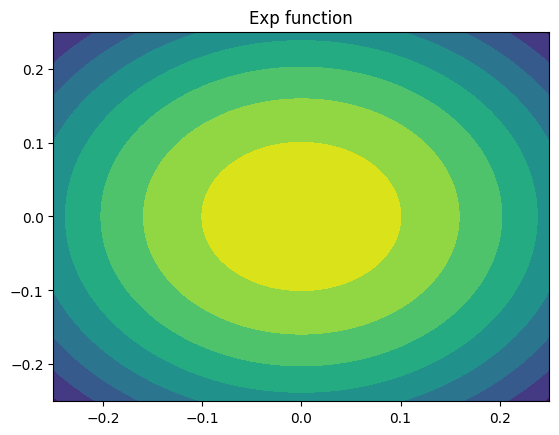

[[24.69310864 12.99409329 10.07054947 ...  8.19341021 10.07054947
  12.99409329]
 [12.99409329  6.08687504  4.78173986 ...  4.0929668   4.93771544
   6.4215981 ]
 [10.07054947  4.78173986  3.42454063 ...  2.66896841  3.49732657
   4.93771544]
 ...
 [ 8.19341021  4.0929668   2.66896841 ...  1.82153638  2.62620587
   4.00135321]
 [10.07054947  4.93771544  3.49732657 ...  2.62620587  3.42454063
   4.78173986]
 [12.99409329  6.4215981   4.93771544 ...  4.00135321  4.78173986
   6.08687504]]


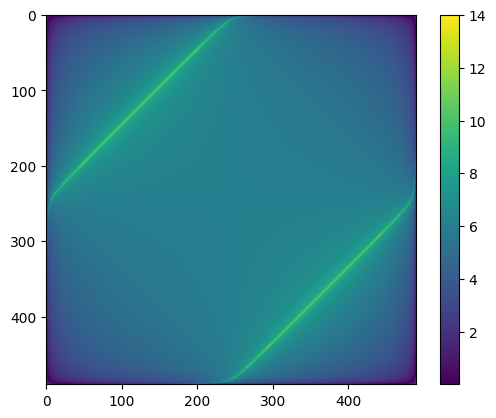

In [ ]:
L = 0.5
M = 1000
x = np.linspace(-L / 2, L / 2, M)
x0 = 0

y = x
X, Y = np.meshgrid(x, y)
w = 1
function_to_be_F_transformed3 = np.exp(-(X**2 + Y**2)/(w**2))

plt.contourf(X, Y, function_to_be_F_transformed3)
plt.title("Exp function")
plt.show()
FT_3 = fft2(function_to_be_F_transformed3[int(M/2 + 10):, int(M/2 + 10):])
print(np.abs(np.log(np.real(FT_3)**2)))
plt.imshow(np.abs(np.log10(np.real(FT_3)**2)))
plt.colorbar()
plt.show()

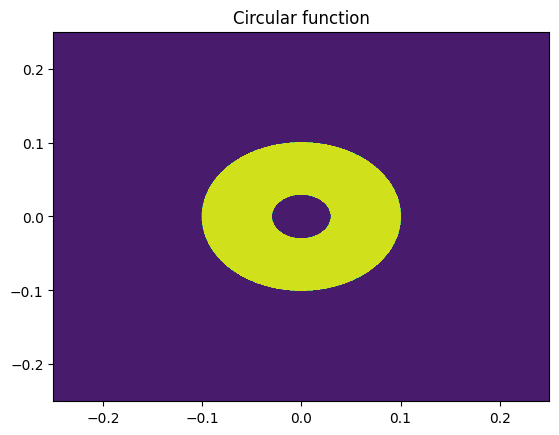

[[8.82084581 8.03571667 7.31538813 ... 5.58030271 7.31538813 8.03571667]
 [8.03571667 8.08361174 8.21229529 ... 6.61777754 6.90955162 8.28184668]
 [7.31538813 8.21229529 6.98545229 ... 5.87513207 5.79016494 6.90955162]
 ...
 [5.58030271 6.61777754 5.87513207 ... 4.4480862  6.83756276 6.60504416]
 [7.31538813 6.90955162 5.79016494 ... 6.83756276 6.98545229 8.21229529]
 [8.03571667 8.28184668 6.90955162 ... 6.60504416 8.21229529 8.08361174]]


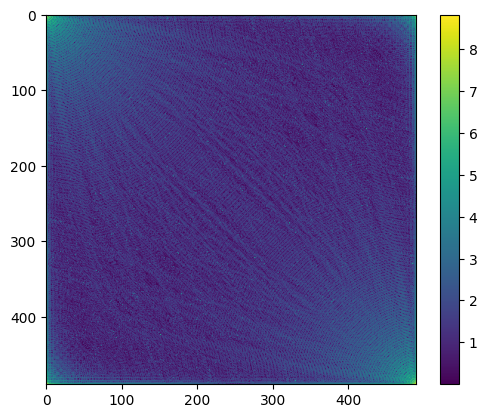

In [ ]:
L = 0.5
M = 1000
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w1 = 0.1
w2 = 0.03

circ_plot = circ(w1)
circ_plot2 = circ(w2)
function_to_be_F_transformed5 = circ_plot(X, Y) - circ_plot2(X, Y)

# 2D plot for the circular function
plt.contourf(X, Y, function_to_be_F_transformed5)
plt.title("Circular function")
plt.title("Circular function")
plt.show()


FT_5 = fft2(function_to_be_F_transformed5[int(M/2 + 10):, int(M/2 + 10):])

print(np.abs(np.log10(np.real(FT_5)**2)))
plt.imshow(np.abs(np.log10(np.real(FT_5)**2)))
plt.colorbar()
plt.show()

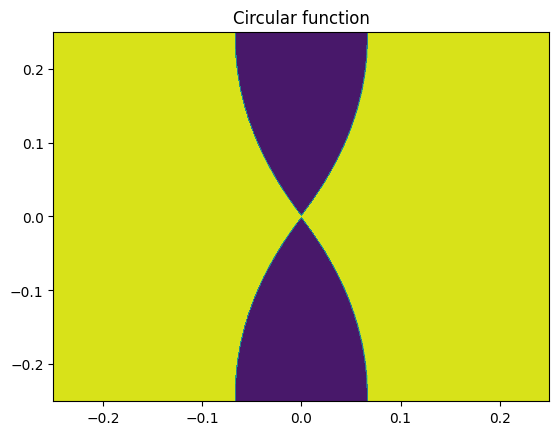

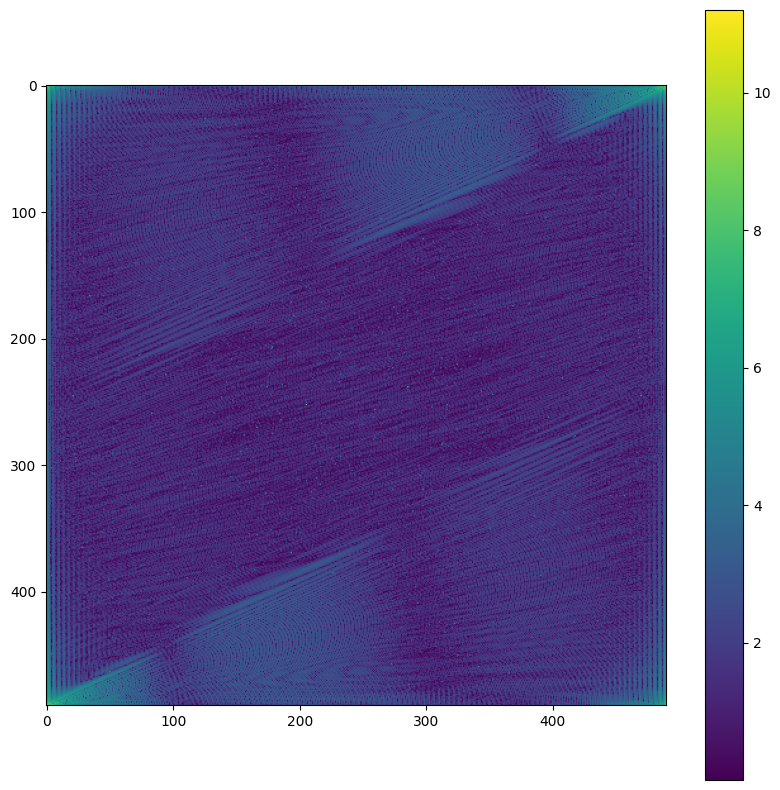

In [ ]:
L = 0.5
M = 1000
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w1 = 0.5
d = 0.001



circ_plot = circ((np.sqrt((X-d/2)**2) + Y**2)/w1)
circ_plot2 = circ((np.sqrt((X + d/2)**2) + Y**2)/w1)
function_to_be_F_transformed6 = circ_plot(X, Y) + circ_plot2(X, Y)

# 2D plot for the circular function
plt.contourf(X, Y, function_to_be_F_transformed6)
plt.title("Circular function")
plt.title("Circular function")
plt.show()


FT_6 = fft2(function_to_be_F_transformed6[int(M/2 + 10):, int(M/2 + 10):])
plt.figure(figsize=(10, 10))
plt.imshow(np.abs(np.log10(np.real(FT_6)**2)))
plt.colorbar()
plt.show()

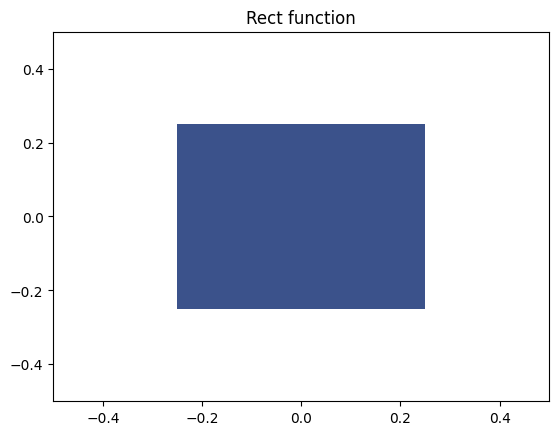

In [ ]:
L = 0.5
M = 100
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w = 0.5


Funct_to_be_convolved_1 = rect(X/2*w)* rect(Y/2*w)
plt.contourf(X, Y, Funct_to_be_convolved_1)
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.title("Rect function")
plt.show()

#Funct_to_be_convolved_2 = rect(X/2*w)* rect(Y/2*w)

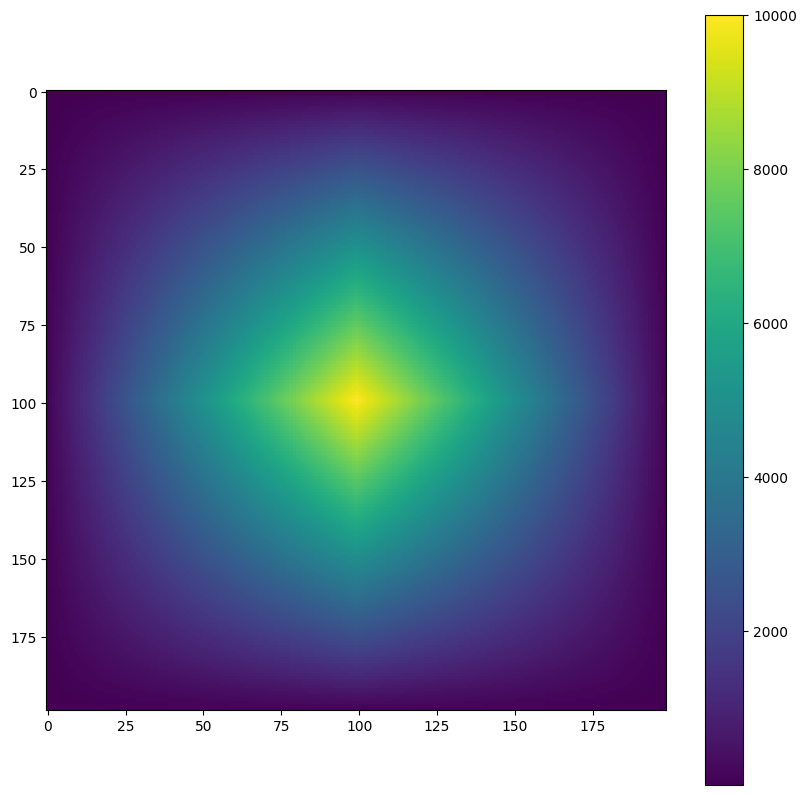

In [ ]:
convolved1 = signal.convolve2d(Funct_to_be_convolved_1,Funct_to_be_convolved_1)
# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(convolved1)
plt.colorbar()
plt.show()



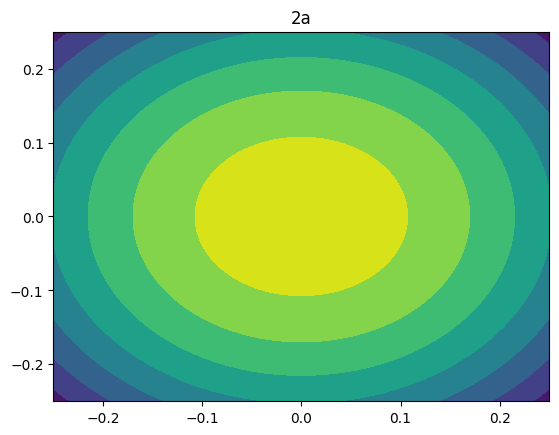

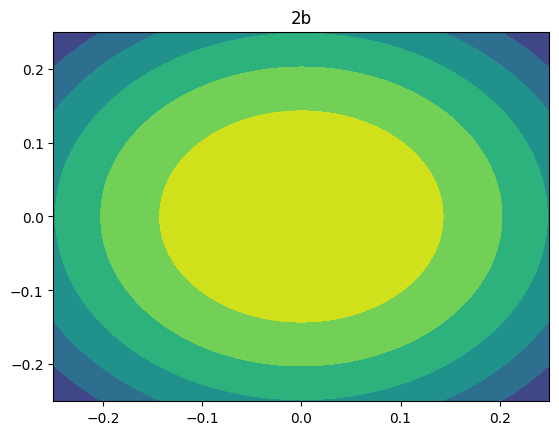

In [ ]:
L = 0.5
M = 100
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w1 = 3
w2 = 4

Funct_to_be_convolved_2a = np.exp(-np.pi*(X**2 + Y**2)/w1**2)
Funct_to_be_convolved_2b = np.exp(-np.pi*(X**2 + Y**2)/w2**2)

#rect(X/2*w)* rect(Y/2*w)
plt.contourf(X, Y, Funct_to_be_convolved_2a)
plt.title("2a")
plt.show()

plt.contourf(X, Y, Funct_to_be_convolved_2b)
plt.title("2b")
plt.show()


#Funct_to_be_convolved_2 = rect(X/2*w)* rect(Y/2*w)

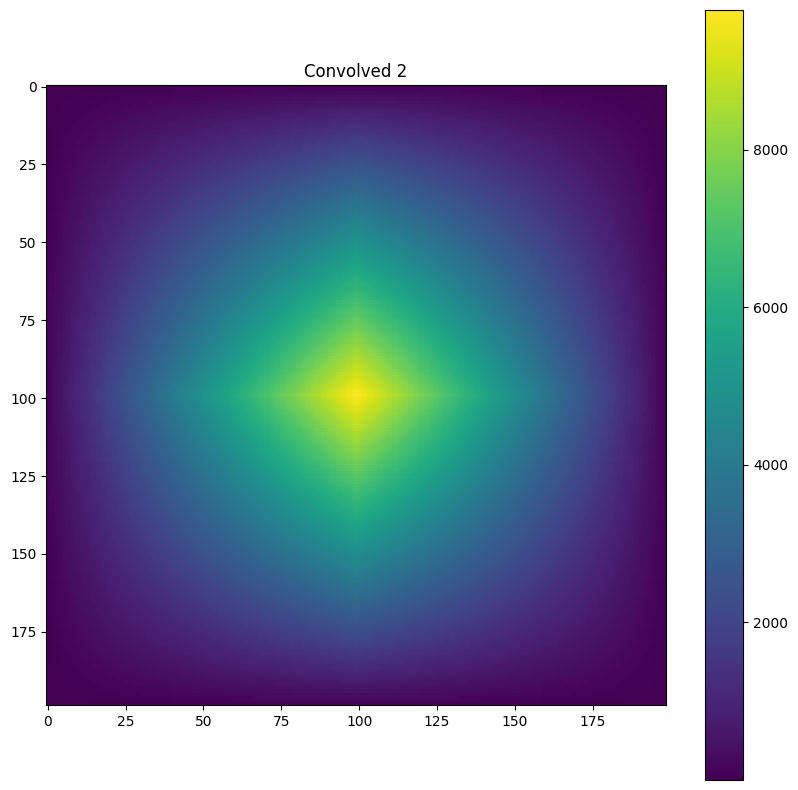

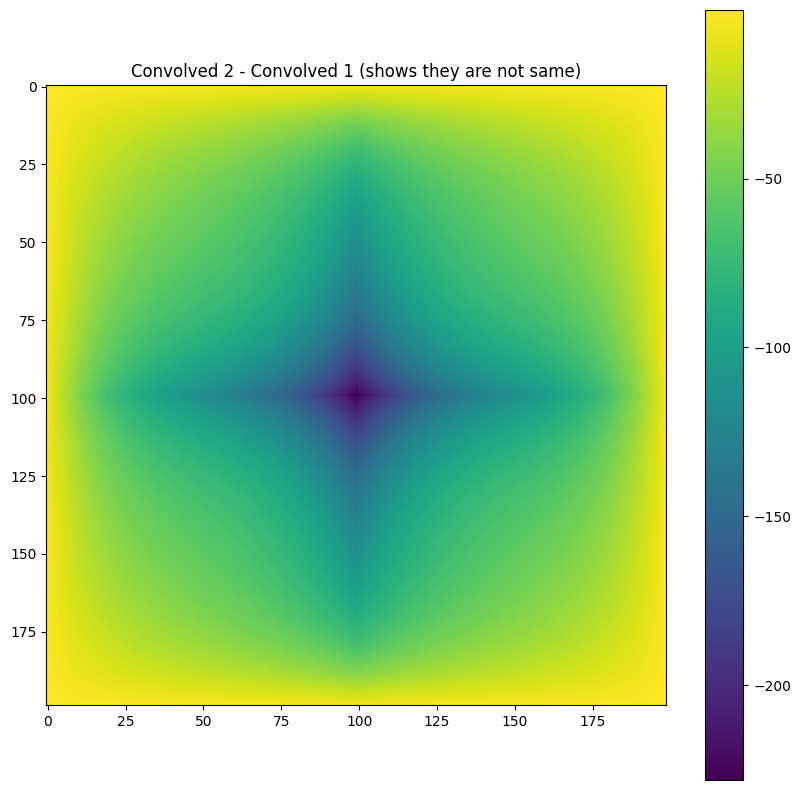

In [ ]:
convolved2 = signal.convolve2d(Funct_to_be_convolved_2a,Funct_to_be_convolved_2b)
# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(convolved2)
plt.colorbar()
plt.title('Convolved 2')
plt.show()

# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(convolved2 - convolved1)
plt.colorbar()
plt.title('Convolved 2 - Convolved 1 (shows they are not same)')
plt.show()

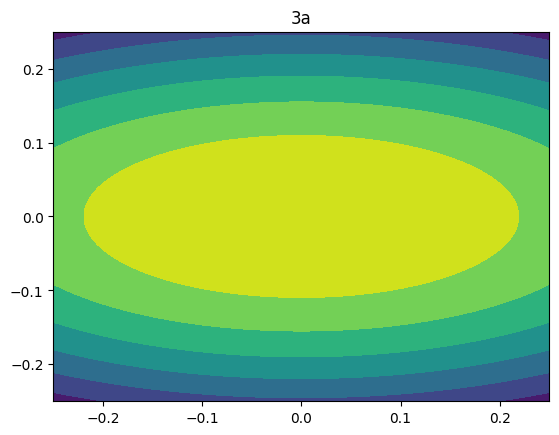

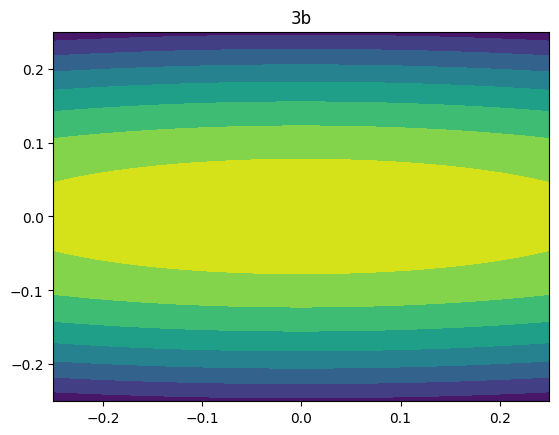

In [ ]:
L = 0.5
M = 100
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w1 = 3
w2 = 4

Funct_to_be_convolved_3a = sinc(X/2)* sinc(Y)
Funct_to_be_convolved_3b = sinc(X/4)* sinc(Y)

#rect(X/2*w)* rect(Y/2*w)
plt.contourf(X, Y, Funct_to_be_convolved_3a)
plt.title("3a")
plt.show()

plt.contourf(X, Y, Funct_to_be_convolved_3b)
plt.title("3b")
plt.show()


#Funct_to_be_convolved_2 = rect(X/2*w)* rect(Y/2*w)

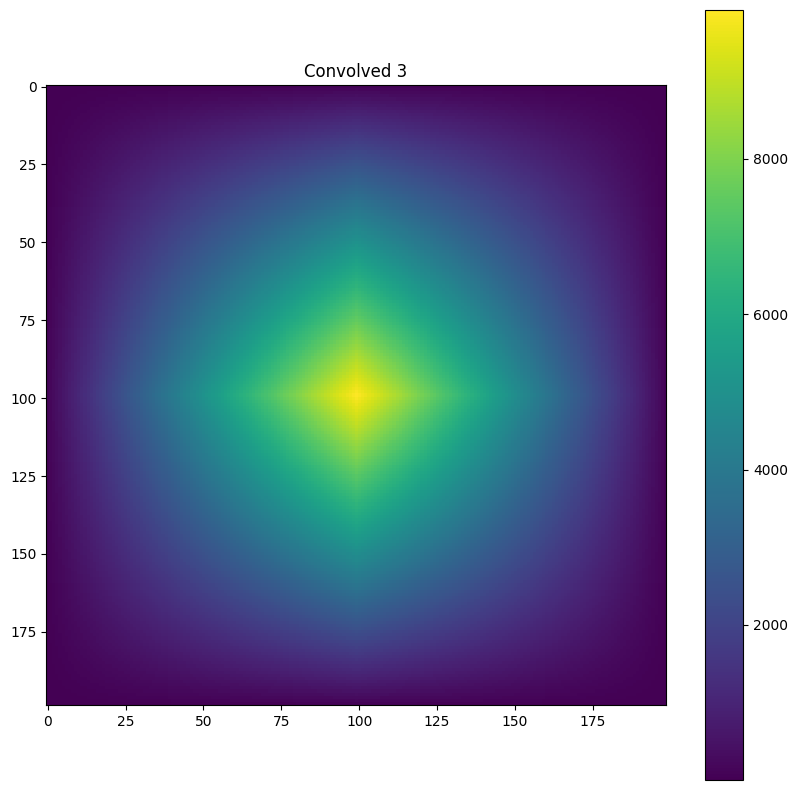

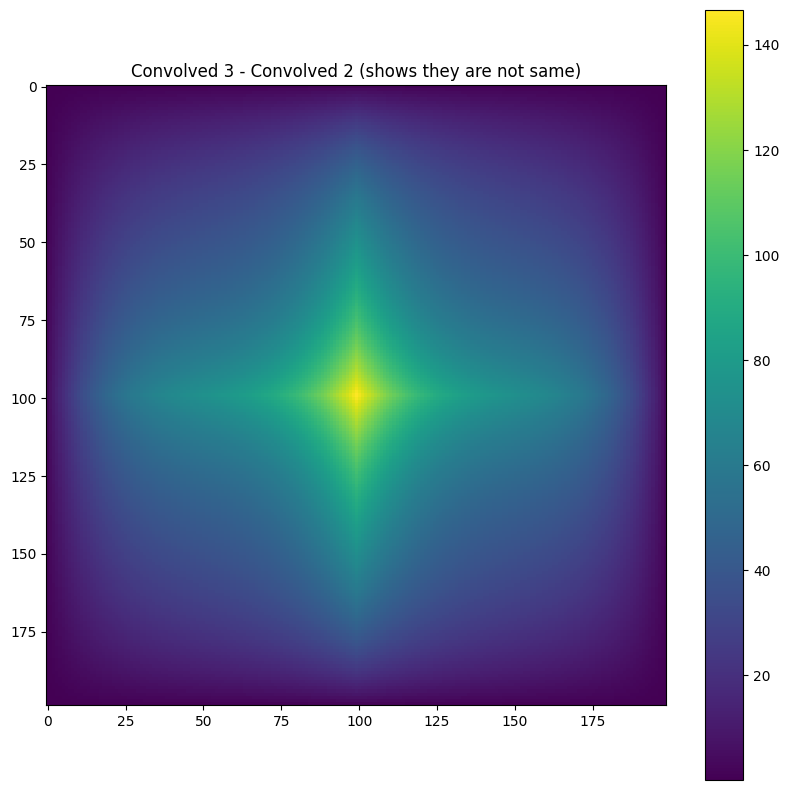

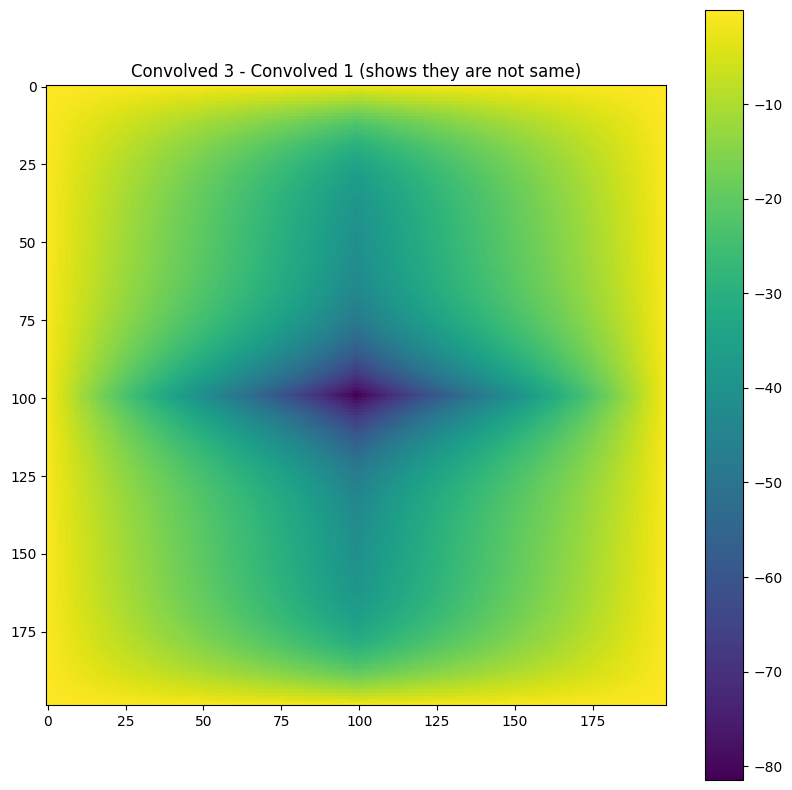

In [ ]:
convolved3 = signal.convolve2d(Funct_to_be_convolved_3a,Funct_to_be_convolved_3b)
# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(convolved3)
plt.colorbar()
plt.title('Convolved 3')
plt.show()

# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(convolved3 - convolved2)
plt.colorbar()
plt.title('Convolved 3 - Convolved 2 (shows they are not same)')
plt.show()

# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(convolved3 - convolved1)
plt.colorbar()
plt.title('Convolved 3 - Convolved 1 (shows they are not same)')
plt.show()

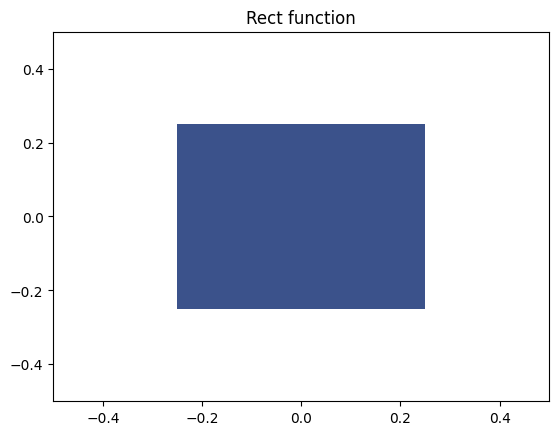

In [ ]:
L = 0.5
M = 100
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w = 0.5

func_to_be_auto_corr1 = rect(X/(2*w))* rect(Y/(2*w))
plt.contourf(X, Y, func_to_be_auto_corr1)
plt.title("Rect function")
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.show()

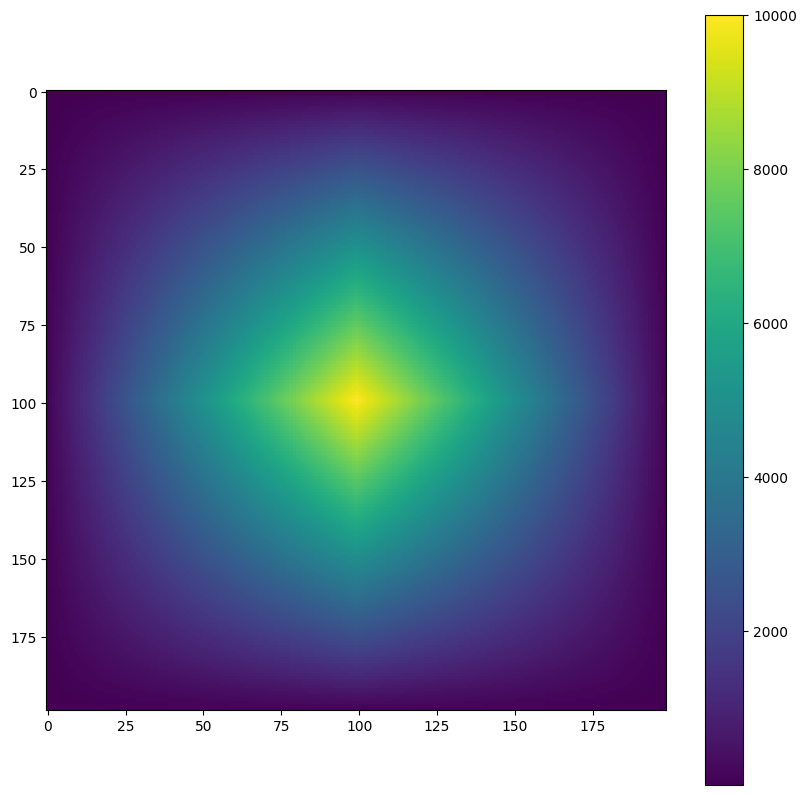

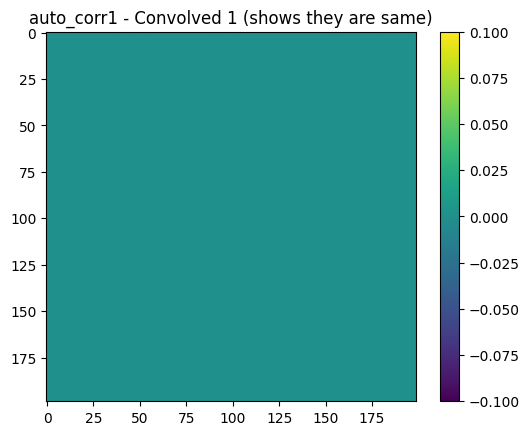

In [ ]:
# find autocorrelation of func_
auto_corr1 = signal.correlate2d(func_to_be_auto_corr1, func_to_be_auto_corr1)
# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(auto_corr1)
plt.colorbar()
plt.show()

plt.imshow(auto_corr1 - convolved1)
plt.colorbar()
plt.title('auto_corr1 - Convolved 1 (shows they are same)')
plt.show()

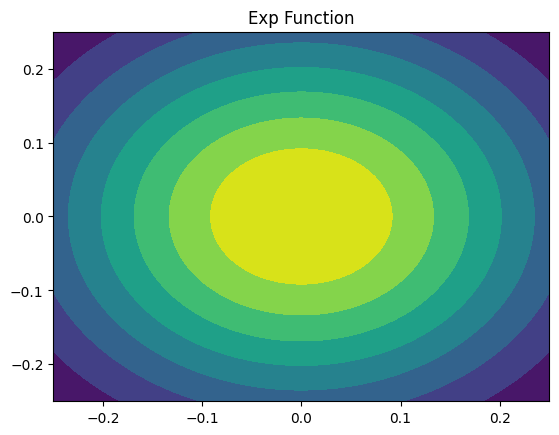

In [ ]:
L = 0.5
M = 100
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w = 0.5

func_to_be_auto_corr2 = np.exp(-np.pi*(X**2 + Y**2)/w**2)
plt.contourf(X, Y, func_to_be_auto_corr2)
plt.title("Exp Function")
plt.show()

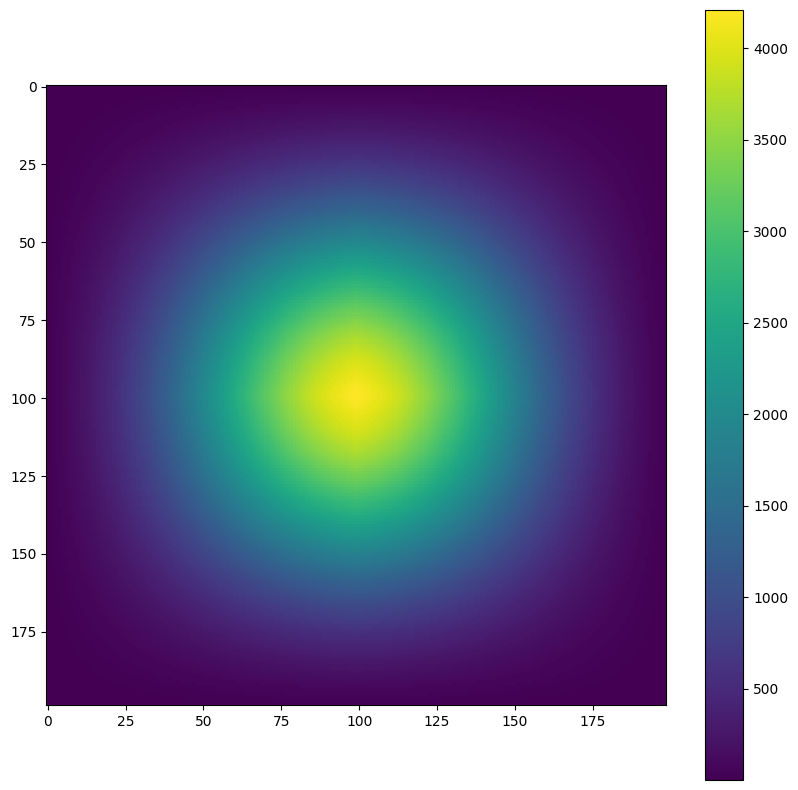

In [ ]:
# find autocorrelation of func_
auto_corr2 = signal.correlate2d(func_to_be_auto_corr2, func_to_be_auto_corr2)
# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(auto_corr2)
plt.colorbar()
plt.show()
